In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import torch
import tensorflow as tf
import scipy.stats as stat
import pylab
%matplotlib inline

In [2]:
df=pd.read_csv('./titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
df['Age'].fillna(df['Age'].median(),inplace=True) ## Median imputation
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

### Standardization
#### x_i = (x_i - x_mean) /(st.dev) (z-score standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
df_scaled=scaler.fit_transform(df)
print(df_scaled.shape)
print(type(df_scaled))
df_scaled

(891, 4)
<class 'numpy.ndarray'>


array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [ ]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


### Min Max Scaling
#### x_i = x_i - x_min /(x_max-x_min)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [ ]:
df_scaled=min_max.fit_transform(df)
print(df_scaled.shape)
print(type(df_scaled))
df_scaled

(891, 4)
<class 'numpy.ndarray'>


array([[0.        , 1.        , 0.27117366, 0.01415106],
       [1.        , 0.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [0.        , 1.        , 0.34656949, 0.04577135],
       [1.        , 0.        , 0.32143755, 0.0585561 ],
       [0.        , 1.        , 0.39683338, 0.01512699]])

In [ ]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


### Robust Scaling
#### x_i = x_i - x_median /(IQR)

In [ ]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()

In [ ]:
df_scaled = robust.fit_transform(df)
print(df_scaled.shape)
print(type(df_scaled))
df_scaled

(891, 4)
<class 'numpy.ndarray'>


array([[ 0.        ,  0.        , -0.46153846, -0.3120106 ],
       [ 1.        , -2.        ,  0.76923077,  2.46124229],
       [ 1.        ,  0.        , -0.15384615, -0.28277666],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.38960398],
       [ 1.        , -2.        , -0.15384615,  0.67328148],
       [ 0.        ,  0.        ,  0.30769231, -0.29035583]])

In [ ]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


### Gaussian Transformation


In [8]:
## If you want to check whether feature is guassian or normal distributed
## Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

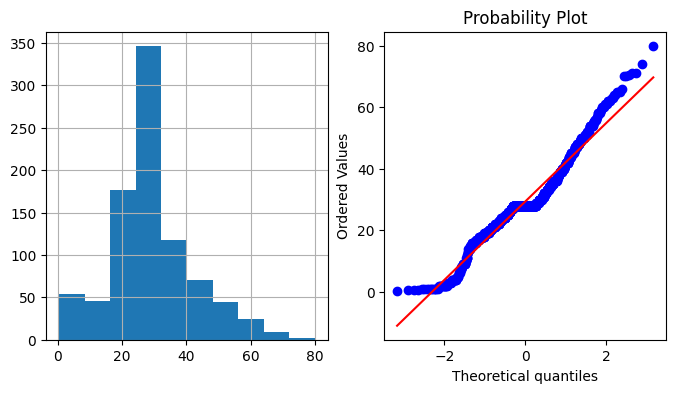

In [9]:
plot_data(df,'Age')

#### Logarithmic Transformation

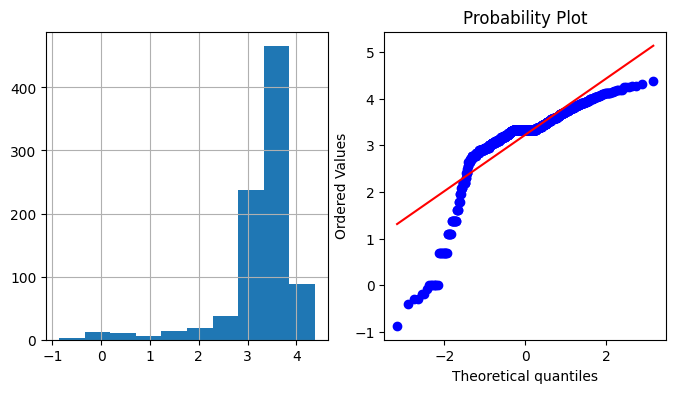

In [10]:
df['Age_log']=np.log(df['Age']) ## works on right/left skewed data
plot_data(df,'Age_log') ## Not suitable for this data after comparing probabilty plot

#### Reciprocal Transformation




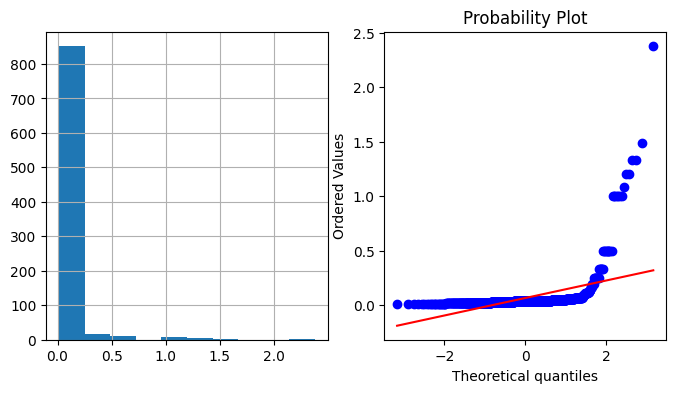

In [11]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal') ## Not suitable for this data after comparing probabilty plot

#### Square-Root Transformation

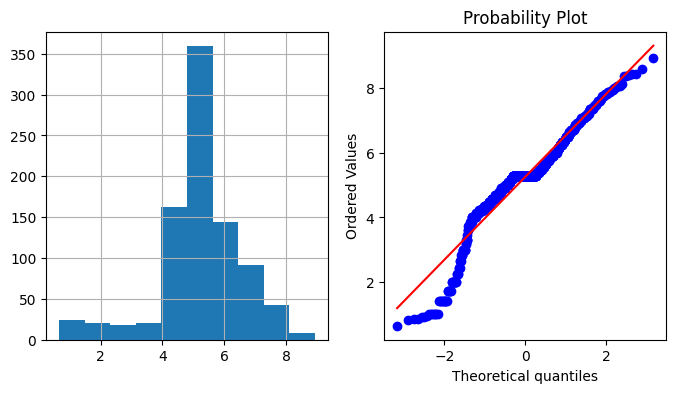

In [12]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

#### Exponential Transformation

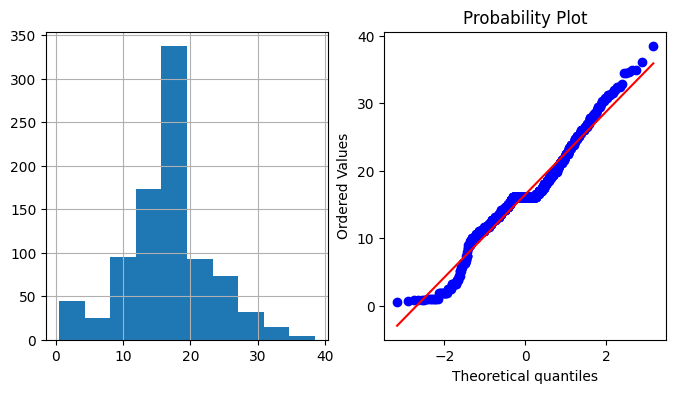

In [13]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')